# Cleaning Airbnb Dataset

In [1]:
import sys
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Loading Files

 - Set up the environment variable
 - Load csv of each city

In [4]:
DIR_PATH =  os.getcwd()
DATA_PATH = os.path.join(DIR_PATH + os.sep, "data")
FRANCE_PATH = os.path.join(DATA_PATH + os.sep, "France")
LYON_PATH = os.path.join(FRANCE_PATH + os.sep, "Lyon" + os.sep)
PARIS_PATH = os.path.join(FRANCE_PATH + os.sep, "Paris" + os.sep)
BDX_PATH = os.path.join(FRANCE_PATH + os.sep, "Bordeaux" + os.sep)

In [110]:
paris_listings = pd.read_csv(PARIS_PATH+"listings.csv", low_memory=False)

In [15]:
paris_reviews = pd.read_csv(PARIS_PATH+"reviews.csv", low_memory=False)

In [17]:
paris_calendar = pd.read_csv(PARIS_PATH+"calendar.csv", low_memory=False)

## Cleangin NaN datas and useless ones

In [111]:
paris_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20181207151406,2018-12-08,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",The district has any service or shop you may d...,"100 m2 loft (1100 sq feet) with high ceiling, ...",none,NaN,...,t,NaN,{PARIS},t,f,strict_14_with_grace_period,f,f,1,NaN
1,3109,https://www.airbnb.com/rooms/3109,20181207151406,2018-12-08,zen and calm,Appartement très calme de 50M2 Belle lumière D...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14,none,NaN,...,t,NaN,{PARIS},f,f,flexible,f,f,1,0.29
2,5396,https://www.airbnb.com/rooms/5396,20181207151406,2018-12-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",...,t,NaN,{PARIS},t,f,strict_14_with_grace_period,f,f,1,1.29
3,7397,https://www.airbnb.com/rooms/7397,20181207151406,2018-12-08,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,...,t,7510400829623,{PARIS},f,f,moderate,f,f,1,2.47
4,7964,https://www.airbnb.com/rooms/7964,20181207151406,2018-12-08,Large & sunny flat with balcony !,Very large & nice apartment all for you! - Su...,hello ! We have a great 75 square meter apartm...,Very large & nice apartment all for you! - Su...,none,NaN,...,t,NaN,{PARIS},f,f,strict_14_with_grace_period,f,f,1,0.06


In [112]:
"""
paris_listings = paris_listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'experiences_offered', 'neighborhood_overview'], axis=1)
paris_listings = paris_listings.drop(['is_business_travel_ready', 'license', 'description', 'require_guest_profile_picture', 'require_guest_phone_verification'], axis=1)
paris_listings = paris_listings.drop(['calculated_host_listings_count', 'requires_license', 'notes'], axis=1)
paris_listings = paris_listings.drop(['transit', 'space', 'summary', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url'], axis=1)
paris_listings = paris_listings.drop(['host_name', 'host_url', 'xl_picture_url', 'picture_url', 'access', 'host_location', 'cancellation_policy'], axis=1)
paris_listings = paris_listings.drop(['host_about', 'host_response_time', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url'], axis=1)
"""
paris_listings = paris_listings.loc[:,['id', 'room_type', 'host_id', 'host_since', 'host_response_rate', 'reviews_per_month', 'review_scores_value', 'review_scores_location', 'review_scores_communication', 
'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_rating', 'price', 'cleaning_fee', 'zipcode', 'number_of_reviews']]


In [113]:
paris_listings = paris_listings.dropna(how='any')
paris_listings

,id,room_type,host_id,host_since,host_response_rate,reviews_per_month,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_rating,price,cleaning_fee,zipcode,number_of_reviews
1,3109,Entire home/apt,3631,2008-10-14,100%,0.29,10.0,10.0,10.0,10.0,10.0,100.0,$75.00,$50.00,75014,7
2,5396,Entire home/apt,7903,2009-02-14,100%,1.29,10.0,10.0,10.0,10.0,9.0,94.0,$115.00,$36.00,75004,148
3,7397,Entire home/apt,2626,2008-08-30,100%,2.47,9.0,10.0,10.0,10.0,9.0,94.0,$115.00,$50.00,75004,231
4,7964,Entire home/apt,22155,2009-06-18,75%,0.06,10.0,10.0,10.0,10.0,10.0,96.0,$99.00,$60.00,75009,6
7,9952,Entire home/apt,33534,2009-08-24,80%,0.24,10.0,10.0,10.0,10.0,10.0,99.0,$70.00,$20.00,75011,17
8,10010,Entire home/apt,33995,2009-08-26,100%,1.33,10.0,10.0,10.0,10.0,10.0,99.0,$135.00,$50.00,75011,144
9,10270,Entire home/apt,33995,2009-08-26,100%,1.46,10.0,10.0,10.0,10.0,10.0,97.0,$105.00,$35.00,75011,147
10,10586,Entire home/apt,37107,2009-09-08,86%,0.38,9.0,9.0,10.0,10.0,10.0,96.0,$80.00,$36.00,75018,41
12,10710,Entire home/apt,38170,2009-09-13,80%,0.36,9.0,10.0,10.0,10.0,9.0,88.0,$85.00,$70.00,75008,38
15,11265,Entire home/apt,41718,2009-09-28,100%,0.43,10.0,10.0,9.0,9.0,10.0,95.0,$100.00,$70.00,75018,13


## Paris Analysis

### Type of room and Price details

In [114]:
# sort by price
paris_listings_per_price = paris_listings.sort_values(by="price")
paris_listings_per_price

,id,room_type,host_id,host_since,host_response_rate,reviews_per_month,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_rating,price,cleaning_fee,zipcode,number_of_reviews
40035,20724108,Entire home/apt,117929471,2017-02-24,100%,0.40,9.0,10.0,10.0,10.0,7.0,87.0,$0.00,$40.00,75016,6
41261,21422028,Entire home/apt,25838188,2015-01-09,89%,0.16,9.0,10.0,9.0,9.0,10.0,100.0,$0.00,$90.00,75011,2
38497,19974916,Entire home/apt,54081344,2016-01-10,100%,2.71,9.0,10.0,10.0,10.0,9.0,90.0,$0.00,$40.00,75018,41
40851,21202285,Entire home/apt,5902799,2013-04-13,100%,1.76,9.0,10.0,9.0,9.0,8.0,94.0,$0.00,$45.00,75005,20
39420,20291987,Entire home/apt,66618414,2016-04-10,100%,1.22,9.0,10.0,10.0,10.0,10.0,92.0,$0.00,$50.00,75116,18
20822,10769269,Entire home/apt,55699319,2016-01-22,90%,0.80,9.0,10.0,10.0,10.0,9.0,90.0,"$1,000.00",$100.00,75006,27
30116,15658427,Entire home/apt,101076033,2016-10-24,100%,0.93,10.0,10.0,10.0,10.0,10.0,100.0,"$1,000.00",$100.00,75002,22
30739,16117580,Entire home/apt,31711910,2015-04-22,100%,1.63,9.0,10.0,10.0,10.0,9.0,94.0,"$1,000.00",$175.00,75001,33
42362,21906933,Entire home/apt,156409454,2017-10-27,86%,0.65,10.0,10.0,9.0,10.0,10.0,97.0,"$1,000.00",$250.00,75116,8
1632,732458,Entire home/apt,3813661,2012-10-09,100%,0.20,9.0,10.0,9.0,10.0,10.0,97.0,"$1,000.00",$90.00,75018,13


In [115]:
paris_listings.price = [x.strip('$') for x in paris_listings.price]
paris_listings.price = paris_listings.price.apply(lambda x: x.replace(',',''))

In [116]:
#mean of price in paris
paris_listings["price"] = pd.to_numeric(paris_listings["price"])
mean_price_paris = paris_listings.price.mean()
print("Mean price in paris per night : "+str(mean_price_paris) + " $ ")

Mean price in paris per night : 113.4619073470865 $ 


<function matplotlib.pyplot.show(*args, **kw)>

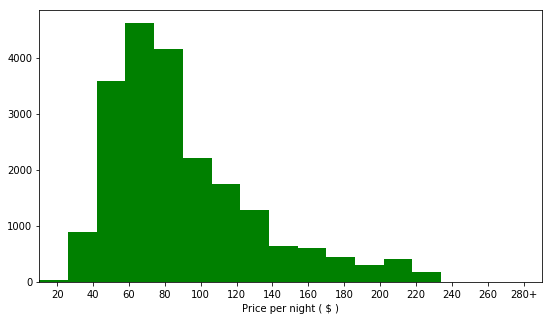

In [117]:
#price_paris = paris_listings['price']
fig, ax = plt.subplots(figsize=(9, 5))
bins = np.arange(0,300,20)
xlabels = bins[1:].astype(str)
xlabels[-1] += '+'
N_labels = len(xlabels)
plt.xlim([0, 350])
plt.xticks(25 * np.arange(N_labels) + 12.5)
ax.set_xticklabels(xlabels)
plt.xlabel("Price per night ( $ )")
plt.hist(price_paris, color='green', bins = bins)
plt.show

In [118]:
total_houses_paris = len(paris_listings)
print("Total of houses in paris having datas : " + str(total_houses_paris))

Total of houses in paris having datas : 22104


In [159]:
# Type of room 
paris_room = paris_listings
paris_entire_house = paris_room.loc[paris_room['room_type'] == "Entire home/apt"]
paris_private_room = paris_room.loc[paris_room['room_type'] == "Private room"]
paris_total_private_room = len(paris_private_room)
print("Total of private room in Paris having datas : "+str(paris_total_private_room))
print("("+str(paris_total_private_room/total_houses_paris *100)+"%)")
print("------------------------------------------------------------")
paris_total_entire_house = (len(paris_listings)-len(paris_private_room))
percentage_entire_house = paris_total_entire_house/total_houses_paris *100 
print("Total of entire house in Paris having datas : "+str(paris_total_entire_house))
print("("+str(percentage_entire_house)+"%)")

Total of private room in Paris having datas : 1986
(8.984799131378935%)
------------------------------------------------------------
Total of entire house in Paris having datas : 20118
(91.01520086862106%)


In [164]:
# Comparison between private and entire house
paris_private_room_mean_price = paris_private_room.price.mean()
print("Mean price of private room in Paris : "+str(paris_private_room_mean_price))
#------------------------------
paris_entire_house_mean_price = paris_entire_house.price.mean()
print("Mean price of entire house in Paris : "+str(paris_entire_house_mean_price))

Mean price of private room in Paris : 65.48791540785498
Mean price of entire house in Paris : 118.74138621794872


### Activity

In [158]:
paris_room

,id,room_type,host_id,host_since,host_response_rate,reviews_per_month,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_rating,price,cleaning_fee,zipcode,number_of_reviews
1,3109,Entire home/apt,3631,2008-10-14,100%,0.29,10.0,10.0,10.0,10.0,10.0,100.0,75.0,$50.00,75014,7
2,5396,Entire home/apt,7903,2009-02-14,100%,1.29,10.0,10.0,10.0,10.0,9.0,94.0,115.0,$36.00,75004,148
3,7397,Entire home/apt,2626,2008-08-30,100%,2.47,9.0,10.0,10.0,10.0,9.0,94.0,115.0,$50.00,75004,231
4,7964,Entire home/apt,22155,2009-06-18,75%,0.06,10.0,10.0,10.0,10.0,10.0,96.0,99.0,$60.00,75009,6
7,9952,Entire home/apt,33534,2009-08-24,80%,0.24,10.0,10.0,10.0,10.0,10.0,99.0,70.0,$20.00,75011,17
8,10010,Entire home/apt,33995,2009-08-26,100%,1.33,10.0,10.0,10.0,10.0,10.0,99.0,135.0,$50.00,75011,144
9,10270,Entire home/apt,33995,2009-08-26,100%,1.46,10.0,10.0,10.0,10.0,10.0,97.0,105.0,$35.00,75011,147
10,10586,Entire home/apt,37107,2009-09-08,86%,0.38,9.0,9.0,10.0,10.0,10.0,96.0,80.0,$36.00,75018,41
12,10710,Entire home/apt,38170,2009-09-13,80%,0.36,9.0,10.0,10.0,10.0,9.0,88.0,85.0,$70.00,75008,38
15,11265,Entire home/apt,41718,2009-09-28,100%,0.43,10.0,10.0,9.0,9.0,10.0,95.0,100.0,$70.00,75018,13
